# Project: Movie Rating Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

In this report, I will analyze the dataframes on movies. Specifically, there are three research questions that will be adressed in this report.  

1. What is the relationship of popularity of the movie and its budget? Do popular movies have higher budgets? 
2. Are older movies more popular than newer ones or vice versa? What year has released the most popular movie? 
3. Do popular movies have recieved highest revenue? What movie have rieceived highest revenue? 

These will be the question scope over the course of the report. 

The report was build around the analysis of one dependent variable(popularity) and three independent variables(budget, revenue, release year)in the movies dataset.


Lets import all the nessecary packges that we will use.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Test



<a id='wrangling'></a>
## Data Wrangling

We can analyze what the each column stands for, the id the unique idea given for each movie, the budget is how much money is spent on the movie production, revenue is how much money is made. Also, there is a title column of the movie, the cast - the actors who took part in the movie, the homepage is the website of the movie where additionla details can be found, the name of the director and others.

### General Properties

Now lets load in the data. We can see that this dataset is about movies; it provides information on the popularity of the movie, its budget, revenue, its title, the cast, the website, its director, runtime, its genre and etc. 
We can see that there are too many variables in our dataset.In the next steps we can decide which variable we can drop and check for cleanliness. Overall, the dataset looks pretty clean. 




In [104]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We are looking at more than 10000 movies so we will be working with large dataset. We have to take that into consideration when we will be working with visualization types.
We have 21 columns, we will drop some fo them to be able to draw more narrow and detailed observations from our dataset.

In [105]:
df_movies.shape

(10866, 21)

For the below dataframes, we can consider the popularity as dependent variable while revenue, budget, release_year as independent variables.
from this observation we can see that the most popular movie has received 32 points. Also, the max budget for the movie was spend was 4.2 while the 75% of the movies costed 1.5 mln.
Most movies are about 102 minutes. 
We can also see that the most movies are released in 2000's, majority of them in 2011. 

In [106]:
df_movies.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [107]:
#we will drop some columns and leave only the ones that will helps us draw interesting data insights

df_movies.drop(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'genres', 'production_companies', 'release_date'], axis=1, inplace=True)

#for some reason if didnt let me drop keywords column thus I used another drop specifically for keywords column. 

df_movies.drop(['keywords'], axis=1, inplace=True)

#now we can see that the data we have in hand has specific datasets we would like to work with.
df_movies.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09


We can check if there are any missing values. It seems like everything is in place and we don't have any missing values. 
Also, our data types seems to me inplace as well majority of them being integers and some floats. 

In [108]:
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   runtime         10866 non-null  int64  
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 933.9+ KB


Next, we would like to see our entire datafram in histograms.
We can see that the most of our variables are skewed to the right, except to the release_year and the revenue_adj. The release_year dataset shows that most movies are made in 2000's. We will epxlore these further in our next steps.

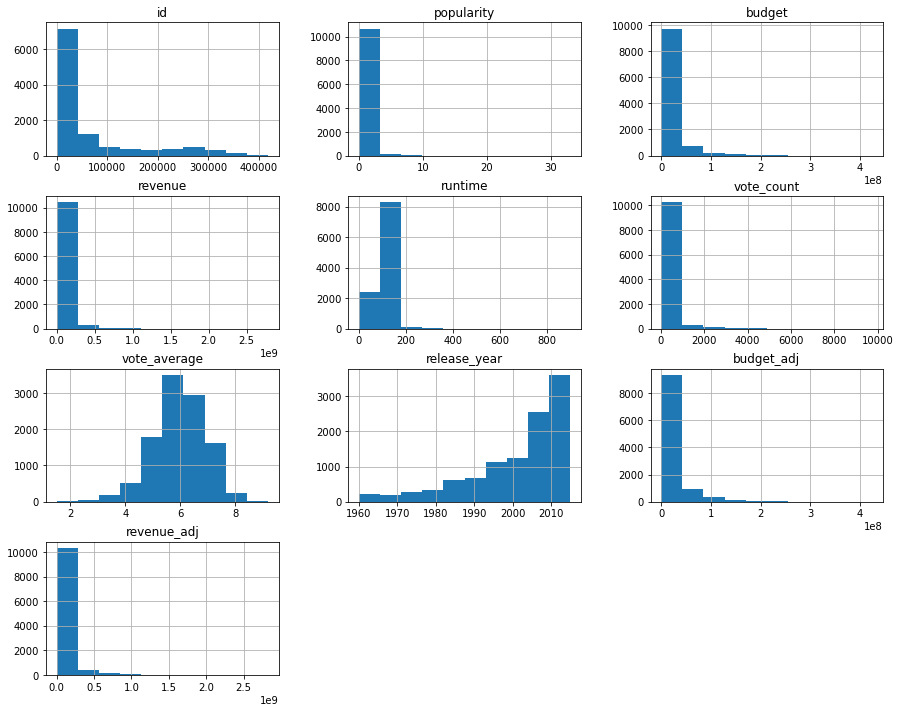

In [109]:
df_movies.hist(figsize=(15,12));


### Data Cleaning

So far we have qucikly analyzed our data, we made sure that data types are represented correctly and performed cleaning such as dropping the columns that are not going to be needed in our analysis. Next lets take a look at our dataset. 


In [110]:
df_movies.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09


### After discussing the structure of the data and any problems that needs to be adressed, this is what we have now. 
it looks clean and easy to comprehend. In the next steps, we will pose our questions, and create vsualiations. 

<a id='eda'></a>
## Exploratory Data Analysis

Now I will move on to exploration of our data, "the juice" of our Project2. Here I will create visualizations with the goal of addressing the research questions that I posed in the Introduction section. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 What is the relationship of popularity of the movie and its budget? Do popular movies have higher budgets? 

First, we will start by looking at popularity dataset which is our dependent variable and its relation to the budget of the movie.
To answer this question lets take a look at the average budget for popular movies. We will use groupby to do that.

In [111]:
df_movies.groupby('popularity').budget.mean()

popularity
0.000065             0.0
0.000188             0.0
0.000620             0.0
0.000973             0.0
0.001115             0.0
                ...     
13.112507    110000000.0
14.311205    170000000.0
24.949134    165000000.0
28.419936    150000000.0
32.985763    150000000.0
Name: budget, Length: 10814, dtype: float64

We can se that the popular movies tend to have higher budgets. Now lets visualize our findings.

We decided to use scatterplot to visualize our dataset beacsue we have more than 10000 dataframes. Here we are looking at the scatterplot of the relationship of two given variables: budget and popularity.

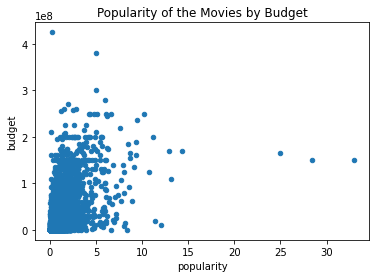

In [115]:
df_movies.plot(x='popularity', y='budget', kind='scatter');
plt.title('Popularity of the Movies by Budget');

As we can see budget of the movie might have strong positive correlation to the popularity of the movie.

Lets find out which movie has the highest budget. Is it the most popular movie? 

In [75]:
df_movies.groupby('popularity').budget.max()


popularity
0.000065             0
0.000188             0
0.000620             0
0.000973             0
0.001115             0
               ...    
13.112507    110000000
14.311205    170000000
24.949134    165000000
28.419936    150000000
32.985763    150000000
Name: budget, Length: 10814, dtype: int64

We can see from the above result that the highest budget was spend on the 4th popular movie. 
Lets find out the name of the movie that has the highest budget.

In [76]:
df_movies.groupby('popularity').original_title.max()

popularity
0.000065        North and South, Book I
0.000188                   The Hospital
0.000620                         G.B.F.
0.000973     Mon petit doigt m'a dit...
0.001115              Khosla Ka Ghosla!
                        ...            
13.112507                     Insurgent
14.311205       Guardians of the Galaxy
24.949134                  Interstellar
28.419936            Mad Max: Fury Road
32.985763                Jurassic World
Name: original_title, Length: 10814, dtype: object

### Our results show that the Guardians of the Galaxy had the highest budget, and it is one of the top 5 popular movies. The answer to the above question is positive. The popular movies tend to have higher budgets. 

### Research Question 2. Are older movies more popular than newer ones or vice versa? What year has released the most popular movie? 

In this question, we want to see in what year popular movies were produced and specifically identify what year released most popular movies. Here we will explore if older movies are more popular compared to newer movies. 

For that we will use groupby to see the average of popular movies in release_year. 

Here popularity is dependednt variable while relaese_year is independent. 

In [77]:

df_movies.groupby('popularity').release_year.mean()


popularity
0.000065     1985.0
0.000188     1971.0
0.000620     2013.0
0.000973     2005.0
0.001115     2006.0
              ...  
13.112507    2015.0
14.311205    2014.0
24.949134    2014.0
28.419936    2015.0
32.985763    2015.0
Name: release_year, Length: 10814, dtype: float64

Above we can can see that majority of popular movies released was from 2000's and the the most popular ones being releseased in 2015.

Now lets take a look at the movies that are most popular in our dataframe.We will use groupby and look the the most popular movie by using the max function

In [78]:
df_movies.groupby('popularity').original_title.max()



popularity
0.000065        North and South, Book I
0.000188                   The Hospital
0.000620                         G.B.F.
0.000973     Mon petit doigt m'a dit...
0.001115              Khosla Ka Ghosla!
                        ...            
13.112507                     Insurgent
14.311205       Guardians of the Galaxy
24.949134                  Interstellar
28.419936            Mad Max: Fury Road
32.985763                Jurassic World
Name: original_title, Length: 10814, dtype: object

Results show that Jurassic World movie is the most popular, followed by Mad Max: Furry Road and later Intersteller.This seems accurate as these three movies were one of the most worldwide popular movies.


Now lets plot above findings. First lets look at one variable through the histogram. Next, we will eexplore the relationship between two variables in the scatterplot.

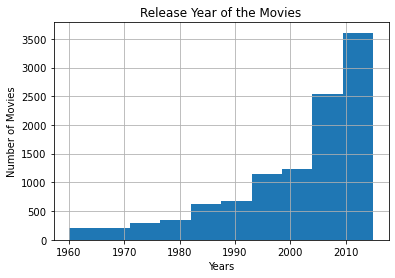

In [116]:
df_movies.release_year.hist()
plt.title('Release Year of the Movies')
plt.xlabel('Years')
plt.ylabel('Number of Movies');

The above histogram shows the number of movies that were released from 2000 to 2010 rose by 3 times. 

Below, we have our scatterplot with two variables. We can see in our scatterplot from the year 2000's there are more popular movies being released.

Specifically after 2010, our scatterplot gets more dense and shows stronger correlation.

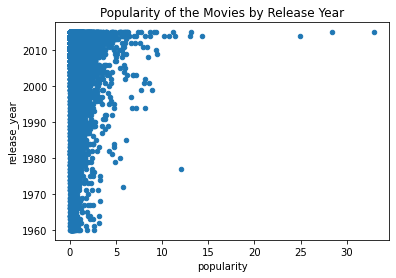

In [117]:
df_movies.plot(x='popularity', y='release_year', kind='scatter');
plt.title('Popularity of the Movies by Release Year');




### So our answer to the 2nd question above is the most popular movies are newer ones, specifcially Jurassic World being the most popular and was released in 2015.

### Research Question 3.  Do popular movies have recieved highest revenue? What movie have rieceived highest revenue? 
Lets take a look at the relationship of the movie revenues and its popularity. We will use groupby to see the mean of popular movie revenues. 

In [118]:
df_movies.groupby('popularity').revenue.mean()

popularity
0.000065     0.000000e+00
0.000188     0.000000e+00
0.000620     0.000000e+00
0.000973     0.000000e+00
0.001115     0.000000e+00
                 ...     
13.112507    2.952382e+08
14.311205    7.733124e+08
24.949134    6.217525e+08
28.419936    3.784364e+08
32.985763    1.513529e+09
Name: revenue, Length: 10814, dtype: float64

It looks like from the above results the popular movies tend to recieve high revenues, the most popular movie has recieved the highest revenue as well.


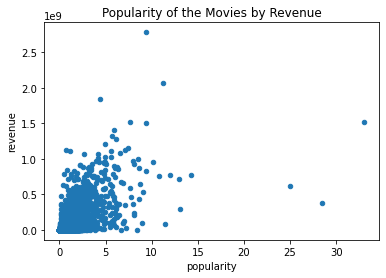

In [119]:
df_movies.plot(x='popularity', y='revenue', kind='scatter');
plt.title('Popularity of the Movies by Revenue');

we can see the positive correlation between revenue and popularity of the movies in our scatterplot. 

Since we already know the most popular movie is Jurassic World, and now we found out that it has the highest revenue. 

In [120]:
df_movies.groupby('popularity')['revenue'].value_counts()

popularity  revenue   
0.000065    0             1
0.000188    0             1
0.000620    0             1
0.000973    0             1
0.001115    0             1
                         ..
13.112507   295238201     1
14.311205   773312399     1
24.949134   621752480     1
28.419936   378436354     1
32.985763   1513528810    1
Name: revenue, Length: 10837, dtype: int64

### The answer to our third question is positive. The most popular movies have recieved the highest revenue. The Jurrasic World has received the highest revenue.


<a id='conclusions'></a>
## Conclusions

To sum up, our preliminary findings suggest that there is correlation between the popularity of the movies and their revenues, budget and the year of production. We found out that the most popular movies have received the highest revenues and had the highest budgets. However, we also saw that the most popular movie, Jurassic World not necessarily spend the higest budget. Also, the newer movies were the most popular movies with the relase year in 2014 and 2015.
Overall, we looked at the correlation of popularity of the movie to its budget and revenue. Also, we explored what years have released the most popular movies. 


This project had limitations since I haven't done any statistical tests, we can not make definite statistical conclusions. This could be further explored using machine learning and A/B tests. 